<a href="https://colab.research.google.com/github/MariaDaniela15/googlecolab/blob/main/proyecto_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORDEN     1724 non-null   int64 
 1   IPAT      1724 non-null   object
 2   FECHA     1724 non-null   object
 3   AÑO       1724 non-null   int64 
 4   MES       1724 non-null   int64 
 5   DIA       1724 non-null   object
 6   GRAVEDAD  1724 non-null   object
dtypes: int64(3), object(4)
memory usage: 94.4+ KB


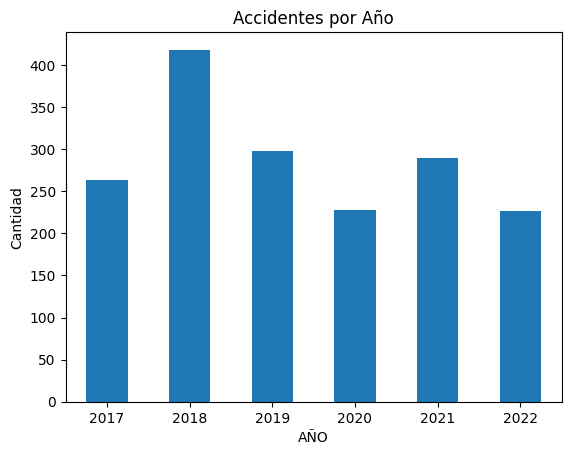

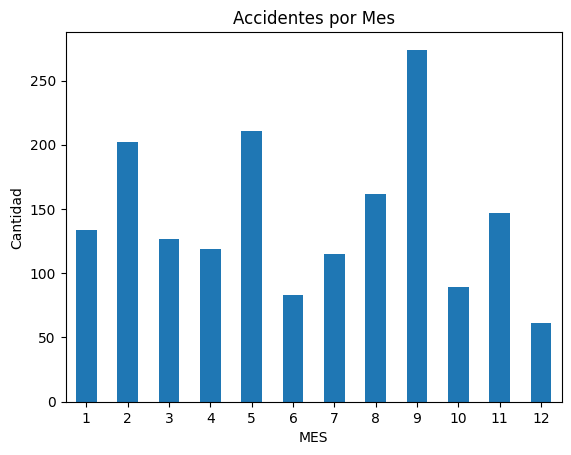

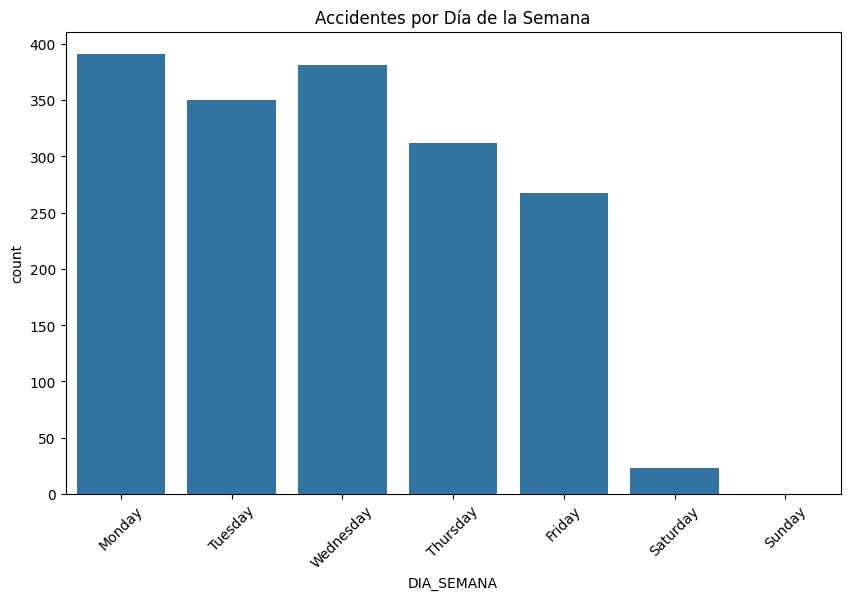

In [14]:
# Análisis de accidentes de tránsito en Colombia
# Fuente de datos: https://www.datos.gov.co/Transporte/ACCIDENTES-DE-TRANSITO-DESDE-MARZO-2017-A-DICIEMBR/wacd-xkg8

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
url = 'https://www.datos.gov.co/api/views/wacd-xkg8/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()

# Tamaño del dataset
df.shape

# Información general de las columnas
df.info()

# Estadísticas descriptivas básicas
df.describe(include='all')

# Convertir fechas
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

# Crear columnas de fecha útiles
df['AÑO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
df['DIA'] = df['FECHA'].dt.day
df['DIA_SEMANA'] = df['FECHA'].dt.day_name()

# Reporte 1: Accidentes por año
accidentes_anio = df['AÑO'].value_counts().sort_index()
accidentes_anio.plot(kind='bar', title='Accidentes por Año', ylabel='Cantidad')
plt.xticks(rotation=0)
plt.show()

# Reporte 2: Accidentes por mes
accidentes_mes = df['MES'].value_counts().sort_index()
accidentes_mes.plot(kind='bar', title='Accidentes por Mes', ylabel='Cantidad')
plt.xticks(rotation=0)
plt.show()

# Reporte 3: Accidentes por día de la semana
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DIA_SEMANA', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidentes por Día de la Semana')
plt.xticks(rotation=45)
plt.show()

# Reporte 4: Comparación entre género de conductores
if 'GENERO_CONDUCTOR' in df.columns:
    df['GENERO_CONDUCTOR'].value_counts().plot(kind='bar')
    plt.title('Género de conductores involucrados')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.show()


# Reporte 5: Gráfico interactivo por departamento
if 'DEPARTAMENTO' in df.columns:
    top_dept = df['DEPARTAMENTO'].value_counts().reset_index()
    top_dept.columns = ['Departamento', 'Accidentes']
    fig = px.bar(top_dept.head(10), x='Departamento', y='Accidentes', title='Top 10 Departamentos con más accidentes')
    fig.show()

# Reporte 6: Mapa de calor por hora si hay columna HORA
if 'HORA' in df.columns:
    df['HORA_INT'] = pd.to_numeric(df['HORA'].str[:2], errors='coerce')
    plt.figure(figsize=(12,6))
    sns.histplot(df['HORA_INT'], bins=24, kde=False)
    plt.title('Distribución de accidentes por hora del día')
    plt.xlabel('Hora')
    plt.ylabel('Cantidad')
    plt.show()


In [6]:
df = pd.read_csv('/content/ACCIDENTES_DE_TRANSITO_DESDE_MARZO__2017_A_DICIEMBRE_DE_2022_20250517.csv', encoding='latin-1')


#1 ESTADISTICAS DESCRIPTIVAS GENERALES

In [15]:
df.describe(include='all')


,ORDEN,IPAT,FECHA,AÑO,MES,DIA,GRAVEDAD,DIA_SEMANA
count,1724.000000,1724,1724,1724.000000,1724.000000,1724.000000,1724,1724
unique,NaN,1724,NaN,NaN,NaN,NaN,3,6
top,NaN,A001460189,NaN,NaN,NaN,NaN,CON HERIDOS,Monday
freq,NaN,1,NaN,NaN,NaN,NaN,994,391
mean,862.500000,NaN,2019-10-15 23:48:18.375869952,2019.316125,6.237819,14.633411,NaN,NaN
min,1.000000,NaN,2017-03-14 00:00:00,2017.000000,1.000000,1.000000,NaN,NaN
25%,431.750000,NaN,2018-05-15 00:00:00,2018.000000,3.000000,8.000000,NaN,NaN
50%,862.500000,NaN,2019-07-16 00:00:00,2019.000000,6.000000,14.000000,NaN,NaN
75%,1293.250000,NaN,2021-03-01 00:00:00,2021.000000,9.000000,22.000000,NaN,NaN
max,1724.000000,NaN,2022-12-19 00:00:00,2022.000000,12.000000,31.000000,NaN,NaN


#2 DISTRIBUCIÓN DE ACCIDENTES POR AÑO

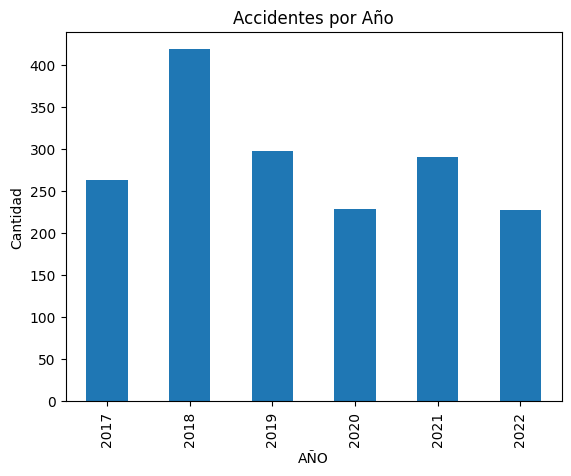

In [16]:
df['AÑO'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidentes por Año')
plt.ylabel('Cantidad')
plt.show()


#3 DISTRIBUCIÓN DE ACCIDENTES POR MES

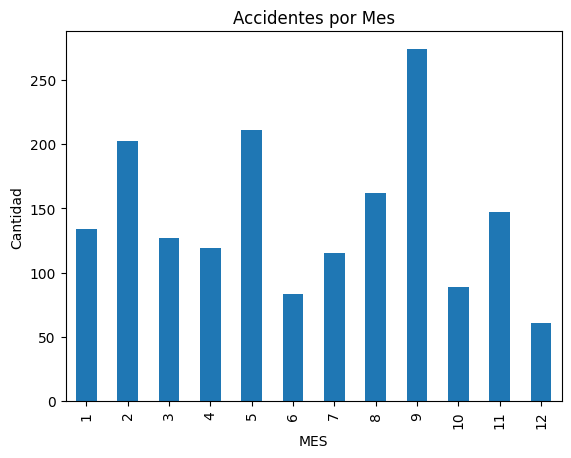

In [17]:
df['MES'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidentes por Mes')
plt.ylabel('Cantidad')
plt.show()


#4 ACCIDENTES POR DIA DE LA SEMANA

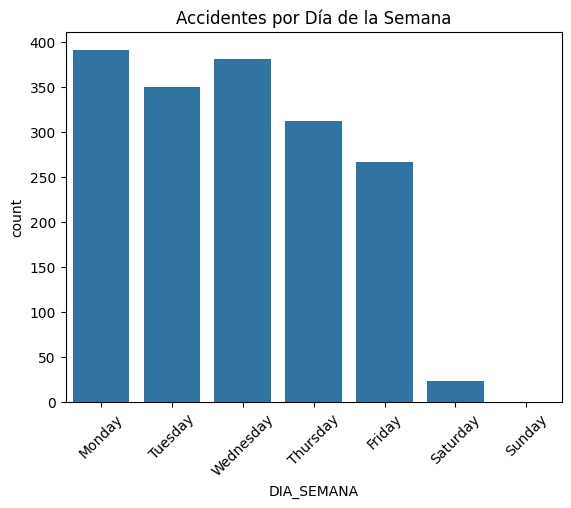

In [21]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='DIA_SEMANA', order=order)
plt.title('Accidentes por Día de la Semana')
plt.xticks(rotation=45)
plt.show()


#5 ACCIDENTES POR GRAVEDAD (variable categorica)

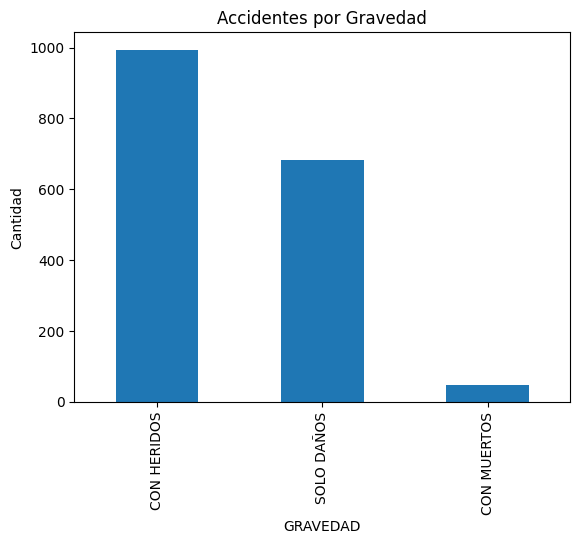

In [22]:
df['GRAVEDAD'].value_counts().plot(kind='bar')
plt.title('Accidentes por Gravedad')
plt.ylabel('Cantidad')
plt.show()


#6. Boxplot de accidentes por día (número del día del mes)

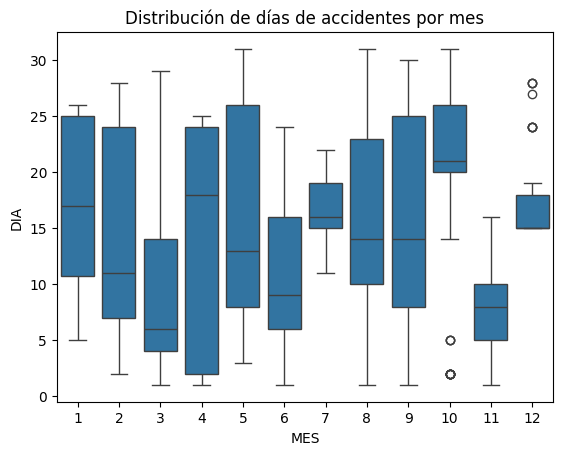

In [23]:
sns.boxplot(x='MES', y='DIA', data=df)
plt.title('Distribución de días de accidentes por mes')
plt.show()


# 7. Histograma de accidentes por día del mes

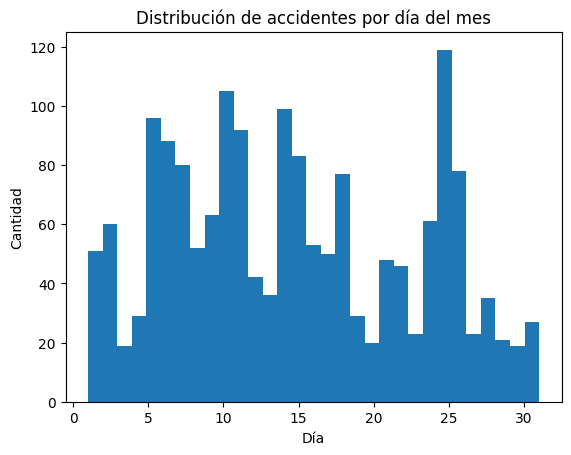

In [24]:
plt.hist(df['DIA'], bins=31)
plt.title('Distribución de accidentes por día del mes')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.show()


# 8. Cruce entre mes y gravedad (tabla cruzada y gráfico)

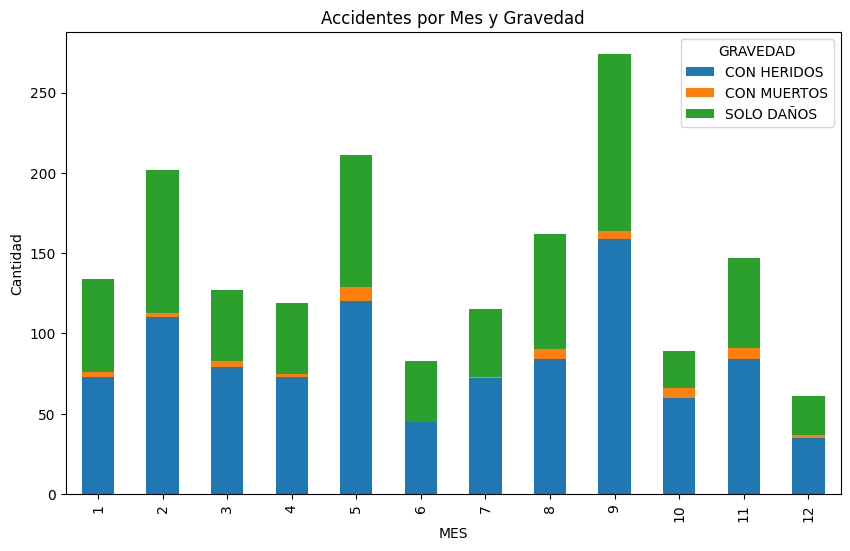

In [25]:
cruce = pd.crosstab(df['MES'], df['GRAVEDAD'])
cruce.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Accidentes por Mes y Gravedad')
plt.ylabel('Cantidad')
plt.show()


# 9. Tendencia temporal: accidentes por fecha

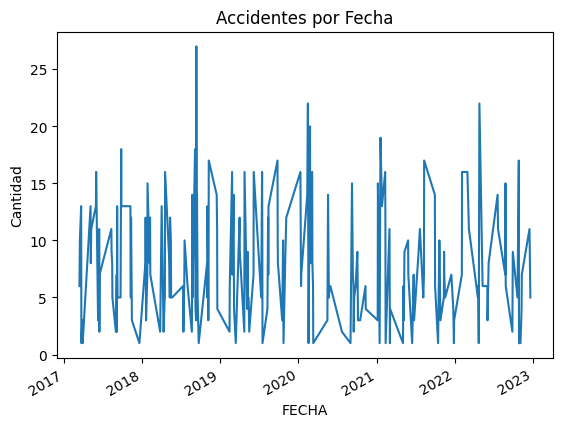

In [26]:
df_fecha = df.groupby('FECHA').size()
df_fecha.plot()
plt.title('Accidentes por Fecha')
plt.ylabel('Cantidad')
plt.show()


# 10. Correlación entre variables numéricas (AÑO, MES, DIA)

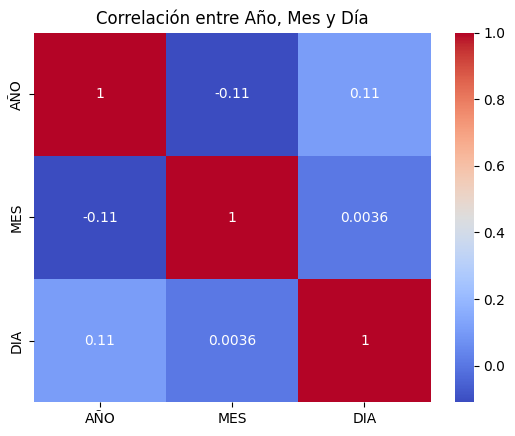

In [27]:
sns.heatmap(df[['AÑO','MES','DIA']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Año, Mes y Día')
plt.show()
